<div style="background-color: rgb(230, 216, 173); padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 20px; color: #0a0a0a;">
        <span style="color: Black;">Neel Adalja</span> <br>
        <span style="font-family: 'Arial', sans-serif; font-size: 12px; color: #0a0a0a;">Data Scientist | Data Analyst</span>
    </div>
</div>

<div style="background-color:hsl(184, 33.00%, 56.10%); padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
    Hosuing Price Modeling and prediction(without outliers) <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">Python | Pandas | Numpy | Scikit-learn | Machine Learning</h3>
</div>

In [2]:
import csv
import pandas as pd
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [3]:
#imported the file without outlier
df = pd.read_csv('./Housing_without_outliers.csv')
df.shape

(2590, 9)

In [4]:
df.head(3)

,Lot Area,Neighborhood,Bldg Type,House Style,Year Built,Year Remod/Add,Full Bath,Bedroom AbvGr,SalePrice
0,31770,NAmes,Single-Family,1,1960,1960,1,3,215000
1,11622,NAmes,Single-Family,1,1961,1961,1,2,105000
2,14267,NAmes,Single-Family,1,1958,1958,1,3,172000


In [5]:
#for the building type and Neighborhood, created 1-hot-encoding to create the categories for ML model. 
dummies = pd.get_dummies(df['Neighborhood'])
dummies_1 = pd.get_dummies(df['Bldg Type'])
df1 = pd.concat([df, dummies.drop('Veenker', axis='columns'),dummies_1], axis='columns')
df1.head(3)

,Lot Area,Neighborhood,Bldg Type,House Style,Year Built,Year Remod/Add,Full Bath,Bedroom AbvGr,SalePrice,Blmngtn,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Multi-Family,Single-Family,Townhouse
0,31770,NAmes,Single-Family,1,1960,1960,1,3,215000,0,...,0,0,0,0,0,0,0,0,1,0
1,11622,NAmes,Single-Family,1,1961,1961,1,2,105000,0,...,0,0,0,0,0,0,0,0,1,0
2,14267,NAmes,Single-Family,1,1958,1958,1,3,172000,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
#since the hot encoding is done, we can drop the original columns. 
df2 = df1.drop(['Neighborhood','Bldg Type'], axis='columns')
df2.head(3)

,Lot Area,House Style,Year Built,Year Remod/Add,Full Bath,Bedroom AbvGr,SalePrice,Blmngtn,Blueste,BrDale,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Multi-Family,Single-Family,Townhouse
0,31770,1,1960,1960,1,3,215000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,11622,1,1961,1961,1,2,105000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,14267,1,1958,1958,1,3,172000,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


In [8]:
df2.columns = df2.columns.str.replace(' ', '_')
print(df2.columns)  # Confirm changes

Index(['Lot_Area', 'House_Style', 'Year_Built', 'Year_Remod/Add', 'Full_Bath',
       'Bedroom_AbvGr', 'SalePrice', 'Blmngtn', 'Blueste', 'BrDale', 'BrkSide',
       'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens',
       'GrnHill', 'IDOTRR', 'Landmrk', 'MeadowV', 'Mitchel', 'NAmes',
       'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer',
       'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Multi-Family',
       'Single-Family', 'Townhouse'],
      dtype='object')


In [9]:
# X will have all the values except sales price because that what we are trying to predict. 
X = X = df2.drop('SalePrice', axis='columns')
X.head(3)

,Lot_Area,House_Style,Year_Built,Year_Remod/Add,Full_Bath,Bedroom_AbvGr,Blmngtn,Blueste,BrDale,BrkSide,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Multi-Family,Single-Family,Townhouse
0,31770,1,1960,1960,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,11622,1,1961,1961,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,14267,1,1958,1958,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# y is the target variable. we are uisng SalesPrice for the prediction. 
y = df2['SalePrice']
y.head(3)

0    215000
1    105000
2    172000
Name: SalePrice, dtype: int64

In [11]:
#Splitting the dataframe into test and train, kept 20% for test and 80% for training. 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
#using the linear regression model. 
Model = LinearRegression()
Model.fit(X_train, y_train)
Model.score(X_test, y_test)

0.7362898459515308

In [13]:
# Using cross validation score on linear regression model to find the model accuracy in different splits. 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits =5, test_size = 0.2, random_state=20)
cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.6660692 , 0.62263317, 0.67880557, 0.70823356, 0.65601268])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#model Predictions. 
y_predicted = Model.predict(X)
y_predicted

array([159100.83390605, 133369.30612039, 139550.12909713, ...,
       165603.8199148 , 136863.75514951, 189935.30329514])

In [31]:
# Error calculations

lr_predictions = Model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_rmse = np.sqrt(lr_mse)

lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R2 Score: {lr_r2}")

Linear Regression MAE: 20264.679126069095
Linear Regression MSE: 26230.836138961095
Linear Regression RMSE: 161.95936570313276
Linear Regression R2 Score: 0.7362898459515308


In [16]:
# Root Mean Square Error
rmse = mean_squared_error(y, y_predicted, squared=False)
rmse

28295.94840228868

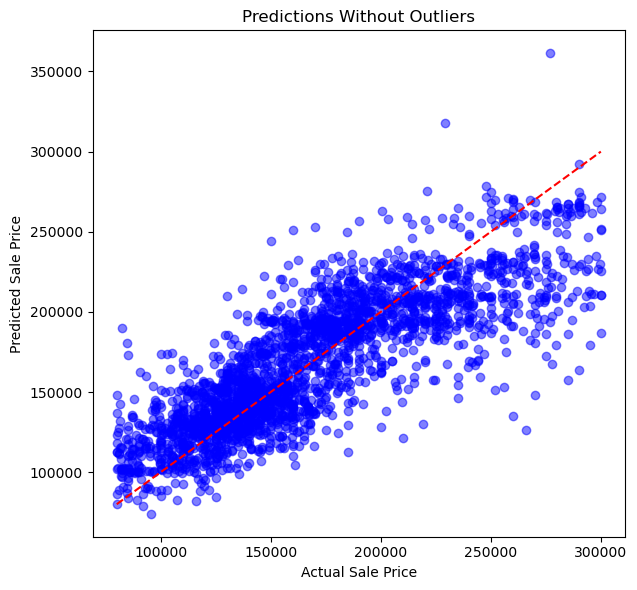

In [17]:
import matplotlib.pyplot as plt

# Ploting the predictions vs actual values for both datasets
plt.figure(figsize=(12, 6))

# Predictions without outliers
plt.subplot(1, 2, 1)
plt.scatter(y, y_predicted, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Predictions Without Outliers')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.tight_layout()
plt.show()

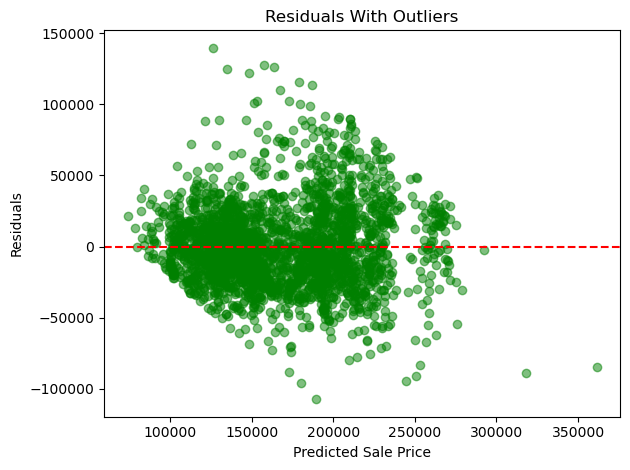

In [18]:
residuals_with_outliers = y - y_predicted

# Residual Graph to find out if the model is notfollowing a pattern or is not replicating. 

plt.subplot(1, 1, 1)
plt.scatter(y_predicted, residuals_with_outliers, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals With Outliers')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

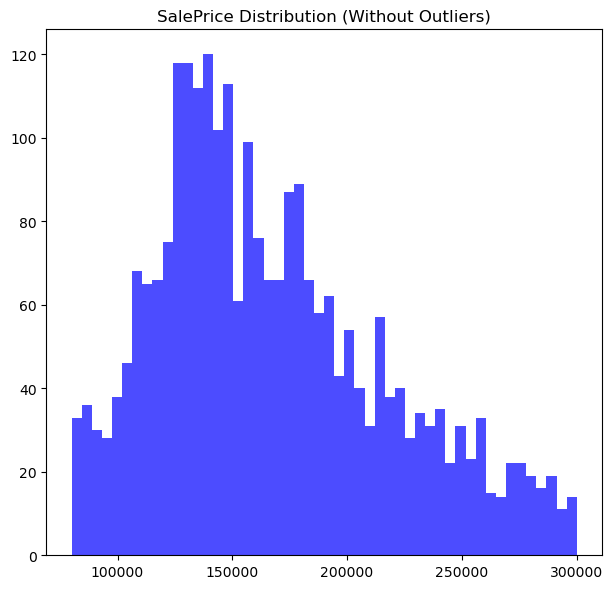

In [19]:
plt.figure(figsize=(12, 6))
#Price Distribution in the model. 
plt.subplot(1, 2, 1)
plt.hist(df2['SalePrice'], bins=50, color='blue', alpha=0.7)
plt.title('SalePrice Distribution (Without Outliers)')

plt.tight_layout()
plt.show()

In [20]:
def predict_price(LotArea, FullBath, BedroomAbvGr):
    # Create a dictionary for the input values
    input_data = {
        'LotArea': [LotArea],
        'FullBath': [FullBath],
        'BedroomAbvGr': [BedroomAbvGr]
    }

    # Add other features as zeros or defaults if necessary
    # For one-hot encoded columns, set all categories to 0 initially

    # Convert to a DataFrame
    input_df = pd.DataFrame(input_data)

    # Ensure the DataFrame matches the trained model's feature order
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    # Make the prediction using the trained model
    predicted_price = Model.predict(input_df)[0]  # Use your trained model
    return predicted_price

# Example usage
#predicted_price = 
predict_price(116200, 1, 2)
#print(f"The predicted price for the given inputs is: ${predicted_price}")


-1754052.2693466041

In [29]:
#using Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_rmse = np.sqrt(dt_mse)

dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree MAE: {dt_mae}")
print(f"Decision Tree MSE: {dt_mse}")
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Decision Tree R2 Score: {dt_r2}")


Decision Tree MAE: 25513.96396396396
Decision Tree MSE: 35046.470180269585
Decision Tree RMSE: 187.2070249223292
Decision Tree R2 Score: 0.5292491100124799


Random Forest MAE: 18527.636972697186
Random Forest MSE: 24723.018802251023
Random Forest RMSE: 157.2355519666307
Random Forest R2 Score: 0.7657359852581718


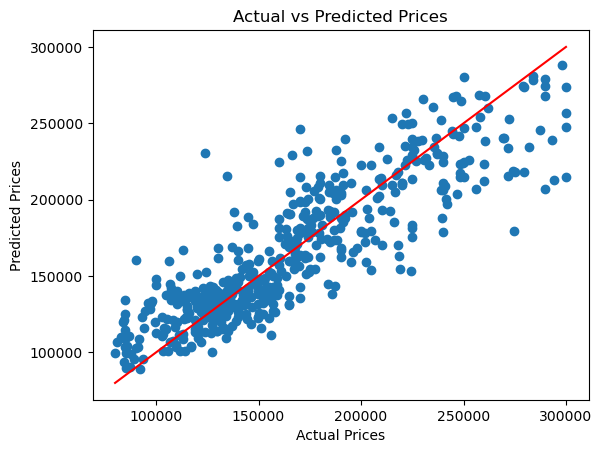

In [35]:
# Using Random Forest Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_rmse = np.sqrt(rf_mse)

rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R2 Score: {rf_r2}")

import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test) 

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line of perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()




In [23]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=100, max_depth=20)
scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Mean RMSE:", np.mean(np.sqrt(-scores)))

Mean RMSE: 27377.262170048332
